# Evidencia Final: Herramientas Computacionales - Análisis de datos
## Miembros del equipo:
- Vera Sofía Acevedo Gómez  A01747156
- Yael Michel García López  A01750911

In [1]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leer el archivo
df = pd.read_csv("unis_clean.csv")

## Hipótesis
### Existe una relación entre la ubicación geográfica de la universidad y su posición en el ranking. Los países mas desarrollados cuentan con mayor número de universidades en rankings más altos.

### Gráfica de pastel

Este gráfico de pastel muestra la distribución de universidades de los distintos países que se encuentran dentro de las primeras 50 posiciones del ranking global. Al observar los porcentajes de los países con mayor presencia en este subconjunto, podemos obtener una idea de cómo ciertos países, en particular aquellos considerados como desarrollados, están representados en las posiciones superiores del ranking. Si los países con una economía y educación fuertes dominan el gráfico, esto puede respaldar la hipótesis de que "existe una relación entre la ubicación geográfica de la universidad y su posición en el ranking". Específicamente, los países más desarrollados podrían tener una mayor proporción de universidades en los primeros puestos, lo que refuerza la idea de que los recursos y la infraestructura educativos de estos países permiten que sus universidades destaquen en los rankings globales.

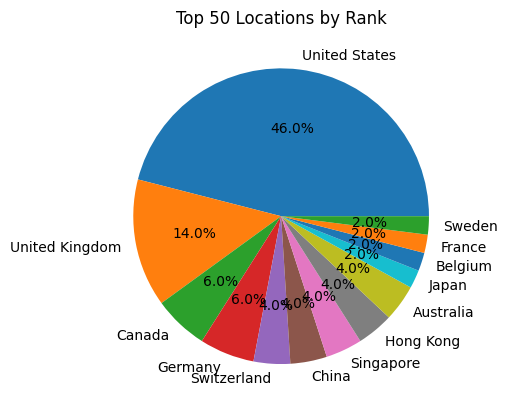

In [3]:
# Filtrar las filas donde el ranking esté en el top 50
top_50 = df[df["University Rank"] <= 50]

# Obtener la cuenta de valores de "Location" en este subconjunto y graficarlo en un gráfico de pastel
top_50["Location"].value_counts().plot.pie(autopct="%2.1f%%")

plt.ylabel('')
plt.title("Top 50 Locations by Rank")
plt.show()

### Gráfica de pastel

Este gráfico de barras muestra el puntaje promedio total (*OverAll Score*) de las universidades, por ubicación geográfica, considerando las primeras 100 posiciones en el ranking global. Al resaltar los 25 países con mayores puntajes promedio, se puede observar cómo algunos países mantienen un desempeño académico particularmente alto en sus universidades mejor clasificadas. 

Este gráfico puede sustentar la hipótesis de que existe una relación entre la ubicación geográfica y el ranking universitario, ya que los países con un puntaje promedio más alto tienden a ser economías desarrolladas que disponen de recursos significativos para la educación superior. Esto sugiere que estos países tienen universidades con la infraestructura, la financiación y los estándares académicos necesarios para alcanzar puntajes competitivos, lo que respalda la afirmación de que los países más desarrollados tienen un mayor número de universidades en los rangos superiores del ranking global.

C:\Users\yaels\AppData\Local\Temp\ipykernel_7428\3625110638.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_countries, x="Location", y="OverAll Score", palette="viridis")


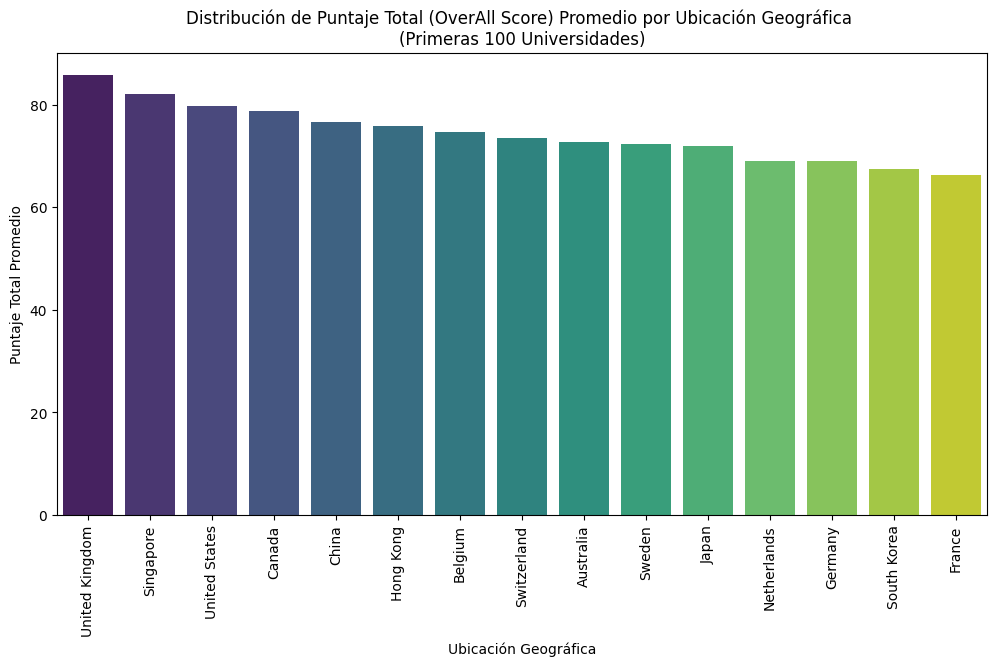

In [4]:
top_100_universities = df[df["University Rank"] <= 100]

# Calculamos el puntaje promedio de "OverAll Score" por ubicación
top_25_countries = (
    top_100_universities.groupby("Location")["OverAll Score"]
    .mean()
    .nlargest(25)  # Seleccionamos los 25 primeros países
    .reset_index()
)

# Graficamos la distribución usando un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=top_25_countries, x="Location", y="OverAll Score", palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribución de Puntaje Total (OverAll Score) Promedio por Ubicación Geográfica \n(Primeras 100 Universidades)")
plt.xlabel("Ubicación Geográfica")
plt.ylabel("Puntaje Total Promedio")
plt.show()

### Correlación

Este tipo de gráfico ayuda a identificar qué variables tienen una relación significativa entre sí. Por ejemplo, una fuerte correlación negativa entre el ranking de la universidad y la puntuación general podría indicar que las universidades con mejores puntajes tienden a tener un mejor ranking, lo que puede sustentar la hipótesis de que los puntajes altos están asociados con posiciones de ranking superiores.

In [5]:
numerical_columns = [col for col in df.columns if df[col].dtype != "O"]
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,University Rank,No of student,No of student per staff,International Student Percentage,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Students Percentage,Male Students Percentage
University Rank,1.000000,-0.004836,0.021111,-0.522913,-0.944695,-0.674402,-0.725921,-0.896693,-0.395419,-0.636015,-0.102314,0.102314
No of student,-0.004836,1.000000,0.377849,-0.100963,0.012283,-0.008661,0.018385,0.028009,-0.014638,-0.036952,0.078904,-0.078904
No of student per staff,0.021111,0.377849,1.000000,-0.041158,-0.045661,-0.137722,-0.005283,-0.017652,-0.003632,0.009635,0.047680,-0.047680
International Student Percentage,-0.522913,-0.100963,-0.041158,1.000000,0.561654,0.422428,0.514293,0.396881,0.219541,0.812242,0.084652,-0.084652
OverAll Score,-0.944695,0.012283,-0.045661,0.561654,1.000000,0.819153,0.867215,0.850239,0.448599,0.638667,0.080816,-0.080816
Teaching Score,-0.674402,-0.008661,-0.137722,0.422428,0.819153,1.000000,0.889754,0.467029,0.484613,0.377566,-0.004978,0.004978
Research Score,-0.725921,0.018385,-0.005283,0.514293,0.867215,0.889754,1.000000,0.510541,0.586644,0.525729,-0.010362,0.010362
Citations Score,-0.896693,0.028009,-0.017652,0.396881,0.850239,0.467029,0.510541,1.000000,0.194546,0.522572,0.141838,-0.141838
Industry Income Score,-0.395419,-0.014638,-0.003632,0.219541,0.448599,0.484613,0.586644,0.194546,1.000000,0.207053,-0.184696,0.184696
International Outlook Score,-0.636015,-0.036952,0.009635,0.812242,0.638667,0.377566,0.525729,0.522572,0.207053,1.000000,0.171831,-0.171831


<Axes: >

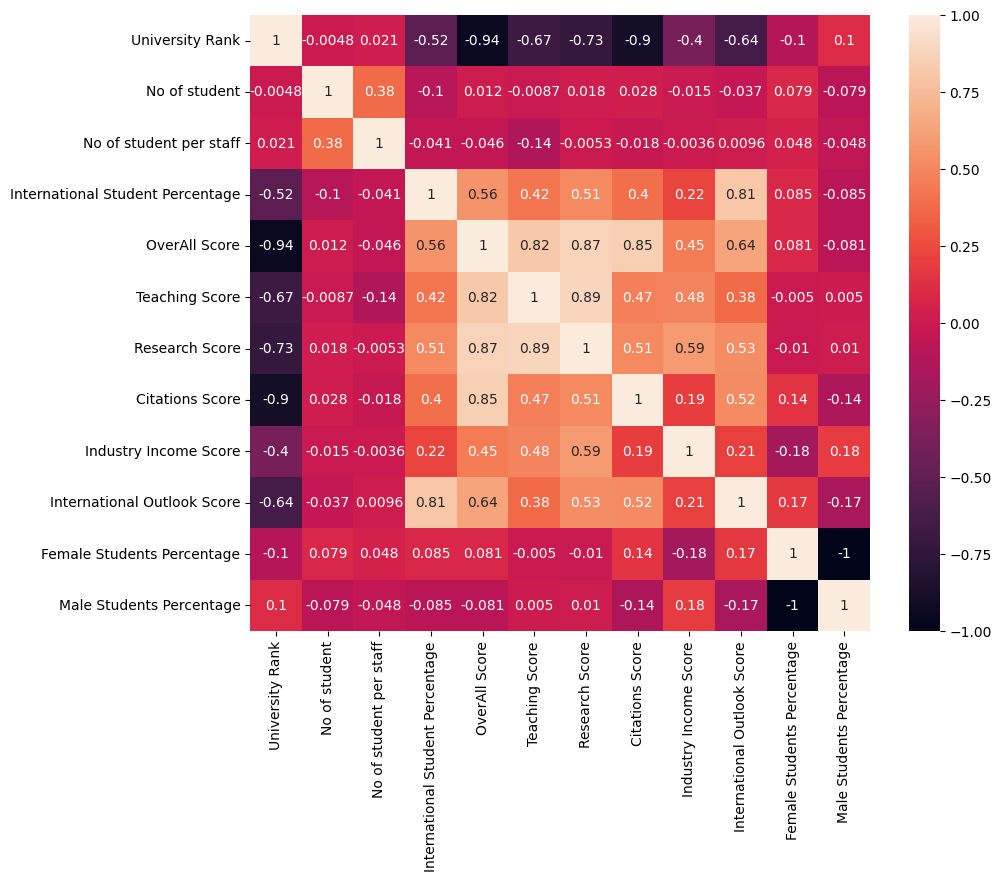

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)

## La hipótesis planteada *se acepta*, ya que los resultados muestran que las universidades con las mejores puntuaciones provienen principalmente de países desarrollados, como Estados Unidos, Reino Unido, Alemania, Francia y Corea del Sur, entre otros. Estos países destacan por su inversión en infraestructura educativa, investigación y recursos académicos, lo cual se refleja en los altos puntajes de sus instituciones en diversas métricas de calidad. Por el contrario, en los primeros lugares del ranking no aparecen universidades de países subdesarrollados, lo que respalda la idea de que el desarrollo económico y educativo de un país influye significativamente en la posición de sus universidades en los rankings globales.